In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("C:\\Users\\user\\Documents\\Datasets\\winequality.csv") # Reading the Data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
X = data.drop(columns = ['quality'])
y = data['quality']

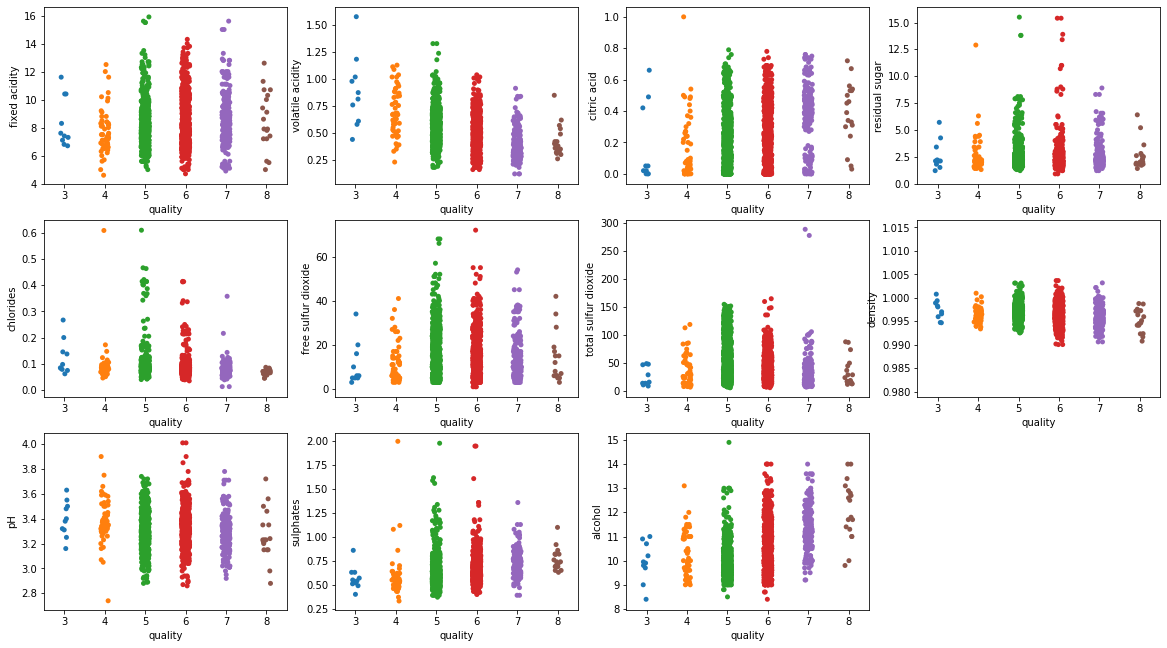

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1
i=1
for column in X:
    if plotnumber<=len(X) :
            ax = plt.subplot(4,4,plotnumber)
            sns.stripplot(y,X[column])
            plotnumber+=1
plt.show()

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 42)

In [9]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
knn.score(x_train,y_train)

0.6718047527296083

In [12]:
y_pred = knn.predict(x_test)
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.4523809523809524


In [39]:
param_grid = { 'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [i for i in range(2,20)],
               'n_neighbors' : [i for i in range(2,30)]
              }

In [40]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [41]:
gridsearch.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 2016 candidates, totalling 6048 fits
[CV] algorithm=auto, leaf_size=2, n_neighbors=2 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=2, score=0.537, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=2 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=2, score=0.504, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=2 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=2, score=0.463, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=3 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=3, score=0.524, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=3 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=3, score=0.473, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=3 ......................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=3, score=0.471, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=4

[Parallel(n_jobs=1)]: Done 6048 out of 6048 | elapsed:  3.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=18,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=13, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None

In [42]:
gridsearch.best_params_


{'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 27}

In [43]:
knn = KNeighborsClassifier(algorithm = 'auto', leaf_size =2, n_neighbors =27)

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [45]:
knn.score(x_train,y_train)

0.5741811175337187

In [46]:
knn.score(x_test,y_test)

0.4523809523809524